### Data

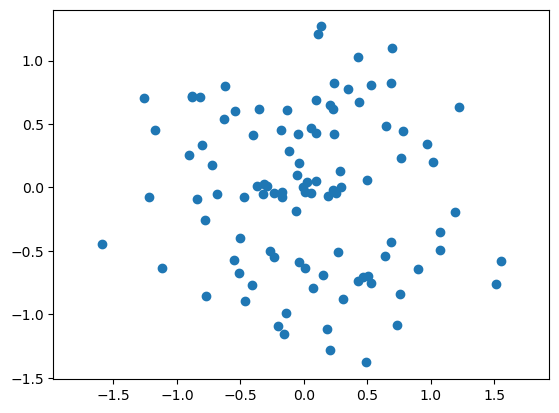

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm

# Generate non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.3, factor=0.4)

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


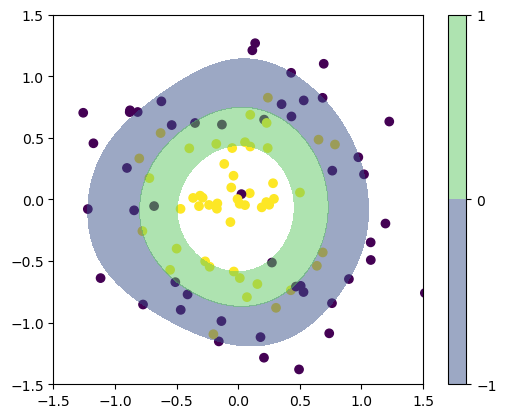

In [34]:
# Create SVM with Gaussian RBF kernel
svm = svm.SVC(kernel='rbf')

# Fit the SVM to the data
svm.fit(X, y)

# Plot the decision boundary and the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Create a meshgrid of the feature space
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a filled contour plot
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='viridis')
plt.colorbar()

# Set the axis limits and aspect ratio
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [35]:
# Calculate accuracy on the training data
accuracy = svm.score(X, y)

print("Accuracy:", accuracy)

Accuracy: 0.84


### Variate standard deviation and sigma

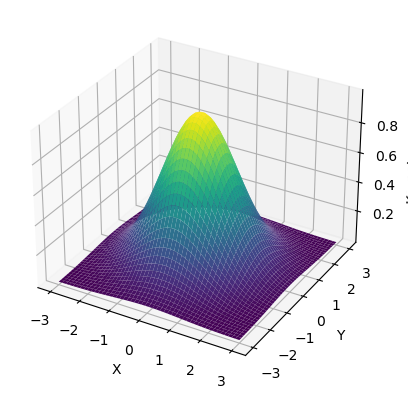

In [36]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.4)

sigma = 1 / np.sqrt(2 * clf.gamma)
desviacion_estandar = sigma


def gaussian_kernel(x, y, gamma):
    return np.exp(-gamma * np.linalg.norm(x-y)**2)

X = np.linspace(-3, 3, 50)
Y = np.linspace(-3, 3, 50)
Z = np.zeros((50, 50))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[i, j] = gaussian_kernel(np.array([x, y]), np.array([0, 0]), clf.gamma)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Kernel value')
plt.show()



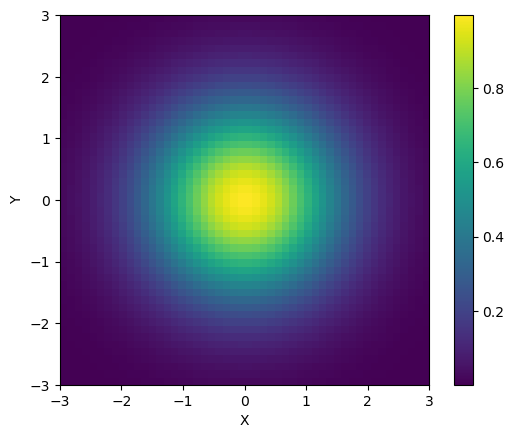

In [37]:
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

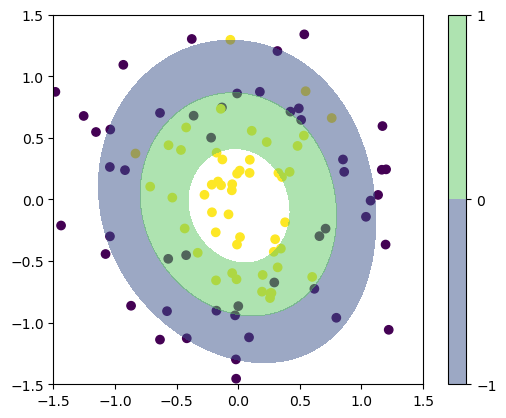

In [38]:

# Generate non-linearly separable data
X, y = make_circles(n_samples=100, noise=0.3, factor=0.4)

# Fit the SVM to the data
clf.fit(X, y)

# Plot the decision boundary and the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Create a meshgrid of the feature space
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a filled contour plot
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='viridis')
plt.colorbar()

# Set the axis limits and aspect ratio
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [39]:
# Calculate accuracy on the training data
accuracy = clf.score(X, y)

print("Accuracy:", accuracy)

Accuracy: 0.86


In [45]:

# Crear lista vacía para almacenar los frames del video
frames = []

# Iterar sobre diferentes valores de gamma y generar las imágenes correspondientes
for gamma in [0.1, 0.5, 1, 5, 10]:
    
    # Generate non-linearly separable data
    X, y = make_circles(n_samples=100, noise=0.3, factor=0.4)

    # Crear un clasificador SVC con kernel RBF y el valor de gamma actual
    clf = svm.SVC(kernel='rbf', gamma=gamma)

    # Fit the SVM to the data
    clf.fit(X, y)

    

